In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-bright','dark_background'])
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [4]:
data.dropna()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [6]:
# checking the distribution
data.dropna()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [8]:
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [9]:
# seperating dependent and independent variables
X = data.drop(columns = ['churn','customer_id'])
Y = data['churn']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [11]:
# splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(scaled_x, Y, test_size = 0.80, stratify = Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4413, 19), (17654, 19), (4413,), (17654,))

#  model building,predictions,odd ratio

In [12]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [13]:
classifier.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [14]:
predicted_values = classifier.predict(x_test)
predicted_probabilities = classifier.predict_proba(x_test)

In [15]:
predicted_values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.62886249, 0.37113751],
        [0.57872506, 0.42127494],
        [0.60685305, 0.39314695],
        ...,
        [0.50538739, 0.49461261],
        [0.57695278, 0.42304722],
        [0.5613152 , 0.4386848 ]]),
 (17654, 2))

In [17]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[10572,  3663],
       [ 1273,  2146]], dtype=int64)

In [18]:
#evaluation metrics

In [19]:
#Accuracy
classifier.score(x_test,y_test)

0.720403308032174

In [20]:
# calculating the precision score
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.36942675159235666

In [21]:
# calculating the recall value
from sklearn.metrics import recall_score
Recall = recall_score(y_test,predicted_values)
Recall


0.6276689090377303

In [22]:
#manually calculating the f1 score
f1 = 2/((1/Precision)+(1/Recall))
f1

0.4651061985262245

In [23]:
from sklearn.metrics import f1_score
F1 = f1_score(y_test,predicted_values)
F1

0.46510619852622453

In [24]:
# calculating precision,recall, f1-score and support at once
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values)

In [25]:
precision

array([0.89252849, 0.36942675])

In [26]:
recall

array([0.7426765 , 0.62766891])

In [27]:
f1

array([0.8107362, 0.4651062])

In [28]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81     14235
           1       0.37      0.63      0.47      3419

    accuracy                           0.72     17654
   macro avg       0.63      0.69      0.64     17654
weighted avg       0.79      0.72      0.74     17654



# presicion recall curve 

In [30]:
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((17651,), (17651,), (17650,))

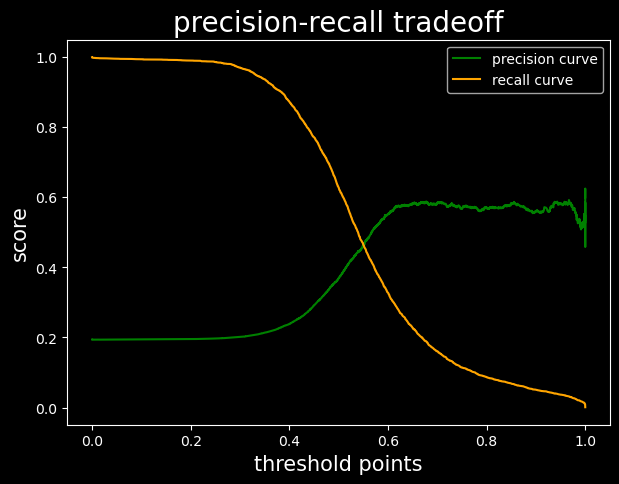

In [32]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot(threshold_points, precision_points[:-1],color = 'green', label = 'precision curve')
plt.plot(threshold_points, recall_points[:-1], color = 'orange', label = 'recall curve')
plt.xlabel('threshold points', fontsize = 15)
plt.ylabel('score', fontsize = 15)
plt.title('precision-recall tradeoff', fontsize = 20)
plt.legend()

# AUC-ROC CURVE 

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold = roc_curve(y_test, predicted_probabilities[:,1])

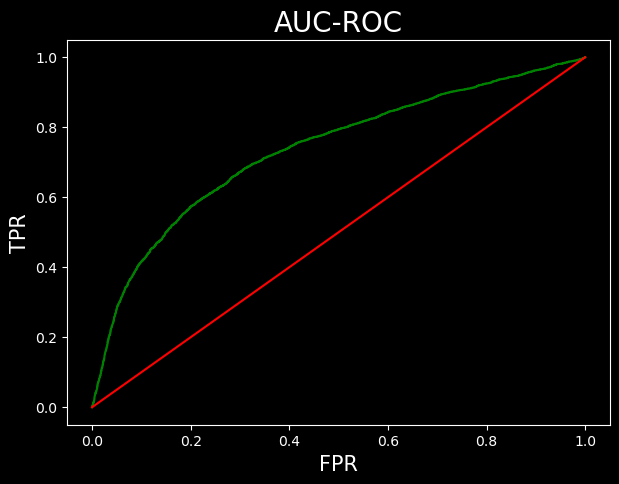

0.7359976116441799

In [34]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot(fpr,tpr, color = 'green')
plt.plot([0,1],[0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR',fontsize = 15)
plt.ylabel('TPR', fontsize = 15 )
plt.title('AUC-ROC',fontsize = 20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

# coefficient plot

In [36]:
#arranging the data
c = classifier.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame({
    'coefficients': c,
    'variable':x
})

#sorting the values
coeff_values = coeff_plot.sort_values(by = 'coefficients')
coeff_values.head()

,coefficients,variable
9,-1.463680,current_balance
17,-1.029087,current_month_balance
18,-0.242106,previous_month_balance
0,-0.207322,vintage
14,-0.191248,previous_month_credit


Text(0.5, 1.0, 'coefficient plot')

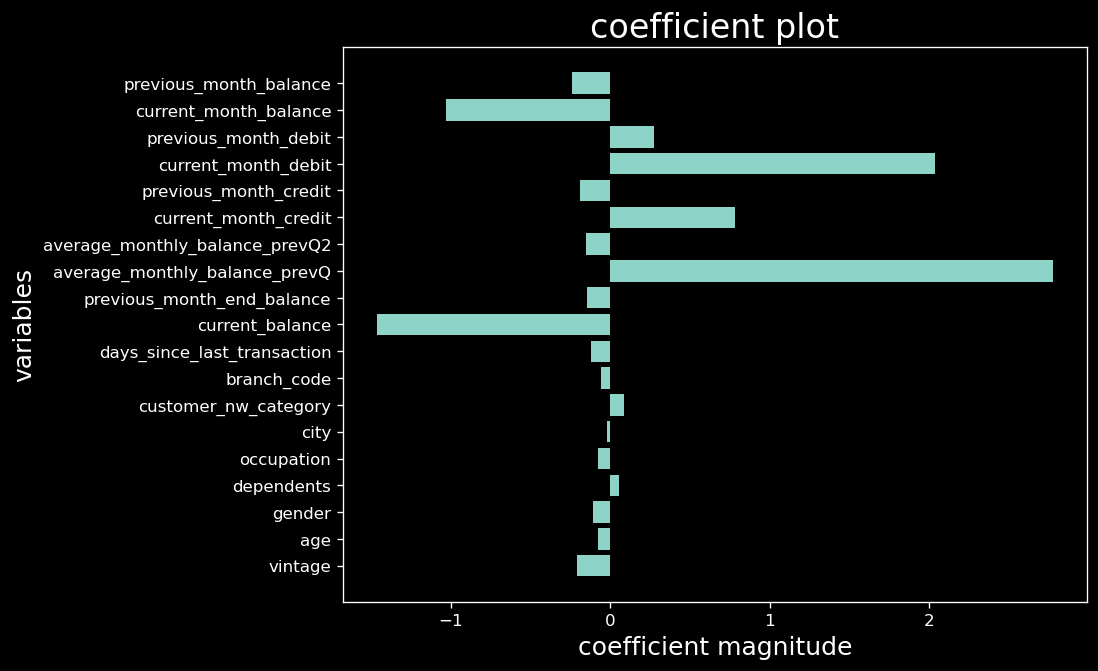

In [37]:
plt.figure(figsize = (8,6), dpi = 120)
plt.barh(coeff_plot['variable'],coeff_plot['coefficients'])
plt.xlabel("coefficient magnitude",fontsize = 15)
plt.ylabel("variables",fontsize = 15)
plt.title('coefficient plot', fontsize = 20)
